In [1]:
# Importing all relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
 churn = pd.read_csv('E:\\Documents\\AIML_masters\\course3_advanced_LinearRegression\\week9\\telecom-churn-case-study-hackathon-c56\\train.csv')

In [3]:
pd.set_option('display.max_columns', None)
churn.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [4]:
churn.shape

(69999, 172)

In [5]:
churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [6]:
churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


**The data has 172 columns and 69999 entries.** 

**The data comprises of float(135), int(28) and object(9) types**

**We can see that there are NaN values in the data after using the HEAD funsction.**

## Data Preparation and Preprocessing

In [8]:
# finding the number of missing values

missing_values = churn.isnull().sum()
print(missing_values)

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64


In [9]:
churn.columns[missing_values > 10000]

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

**A few of the columns have a large number of missing values**

**It is observed that the date of data recharge for all three months are mostly NaN telling that most users don't go for a data recharge, this is evidenced by the fact that users have the same number of missing values for all the data recharge columns for the respective months**

**These columns hence can be removed**

In [10]:
# removing all the columns with missing values above 10000


churn = churn.drop(columns = missing_values[missing_values > 10000].index)

In [11]:
churn.shape

(69999, 142)

In [12]:
## Removing the ID and date columns

churn = churn.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','id','circle_id'], axis =1)


In [13]:
churn.shape

(69999, 134)

In [14]:
churn.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.1

In [15]:
#displaying the missing values 

missing_values = churn.isna().sum()
print(missing_values)

loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
arpu_6                 0
arpu_7                 0
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 134, dtype: int64


**The missing values can be imputed with the median of each numerical column.**

In [16]:
churn = churn.apply(lambda x: x.fillna(x.median()))

In [17]:
# checking missing values for all columns again

missing_values = churn.isna().sum()
missing_values_df = pd.DataFrame(missing_values).T
print(missing_values_df)


   loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  arpu_6  arpu_7  arpu_8  \
0               0               0               0       0       0       0   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0            0            0            0             0             0   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0             0              0              0              0              0   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0              0              0                 0                 0   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0                 0                 0                 0                 0   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0                 0                 0                 0                 0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0                 0

**There are no missing values we can proceed with the analysis**

In [18]:
churn.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,0.0,0.0,0.0,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.521038,44.838857,43.890335,91.173739,88.855772,88.435599,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,140.781376,137.782090,136.405430,77.431415,80.560009,79.055781,84.82

**It is observed that for a few columns the min and max values as well as other metrics are zero suggesting they are empty columns with only zeroes**

In [19]:
# Deleting such columns

churn = churn.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1)

In [20]:
churn.shape

(69999, 125)

In [21]:
# combining the arpu and total recharge amount for all three months by taking their averages to derive new columns

churn['arpu'] = (churn.arpu_6 + churn.arpu_7 + churn.arpu_8)/3
churn['total_rech_amt'] = (churn.total_rech_amt_6 + churn.total_rech_amt_7 + churn.total_rech_amt_8)/3


In [22]:
# dropping the old columns

churn = churn.drop(['arpu_6','arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'], axis =1 )

In [23]:
churn.shape

(69999, 121)

In [24]:
# only retaining the customers that have recharge amount greater than the median.

median_total_rech_amt = churn['total_rech_amt'].quantile(0.5)
churn_filtered = churn[churn['total_rech_amt'] >= median_total_rech_amt]

In [25]:
churn_filtered.shape

(35028, 121)

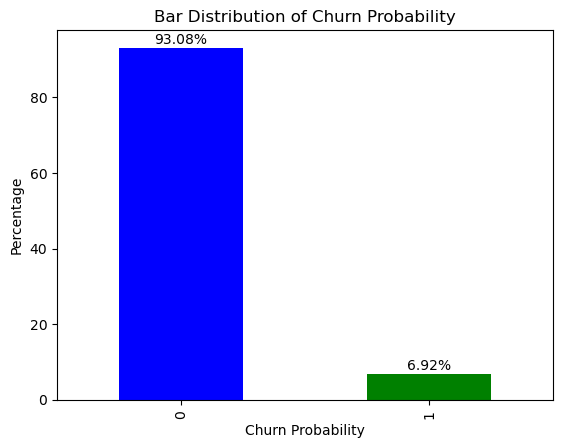

In [26]:
# plot the distribution of churn probability

churn_prob_counts = churn_filtered['churn_probability'].value_counts(normalize=True) * 100

# Plot the bar distribution with customized colors
ax = churn_prob_counts.plot(kind='bar', color=['blue', 'green'])


plt.xlabel('Churn Probability')
plt.ylabel('Percentage')
plt.title('Bar Distribution of Churn Probability')


for i, v in enumerate(churn_prob_counts):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center')


plt.show()


**The sample of churn customers is very low in the data.**

In [27]:
# creating a variable from 'aon' called 'tenure' customer age in months

churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

#dropping old column 

churn_filtered.drop(['aon'], axis=1, inplace=True)

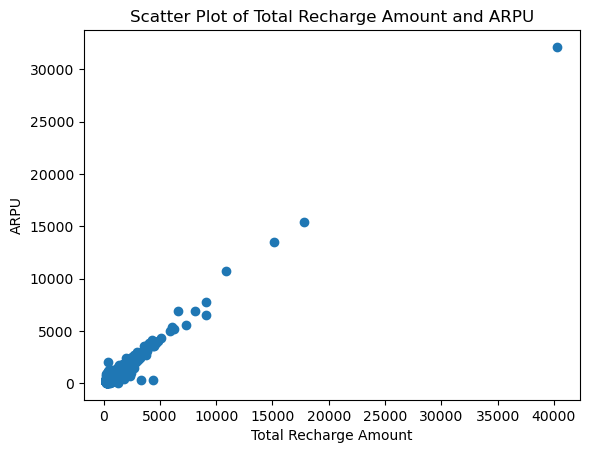

In [28]:

# create a scatter plot between 'arpu' and 'total_rech_amt'

plt.scatter(x=churn_filtered['total_rech_amt'], y=churn_filtered['arpu'])


plt.xlabel('Total Recharge Amount')
plt.ylabel('ARPU')
plt.title('Scatter Plot of Total Recharge Amount and ARPU')


plt.show()


**The variables are highly correlated as can be expected since the increase in total_rech_amt should lead to an increase in the average revenue per user.**

**One of the columns can be dropped after the heatmap plot**

In [29]:
# calculate correlation matrix

correlation_matrix = churn_filtered.corr()
churn_probability_corr = correlation_matrix['churn_probability'].drop('churn_probability')  # Exclude correlation with itself


churn_probability_corr_sorted = churn_probability_corr.abs().sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print(churn_probability_corr_sorted)


total_ic_mou_8        0.160106
std_og_mou_6          0.153527
loc_ic_mou_8          0.137697
loc_og_t2m_mou_8      0.134781
loc_ic_t2m_mou_8      0.131669
total_og_mou_8        0.129963
loc_og_mou_8          0.128942
total_rech_num_8      0.120601
std_og_t2t_mou_6      0.115722
std_og_t2m_mou_6      0.115315
last_day_rch_amt_8    0.110452
tenure                0.109509
total_og_mou_6        0.106573
max_rech_amt_8        0.104647
roam_og_mou_7         0.096630
onnet_mou_6           0.096069
offnet_mou_8          0.094052
roam_og_mou_8         0.087895
loc_ic_t2m_mou_7      0.085953
loc_ic_mou_7          0.085546
loc_og_mou_7          0.083802
loc_og_t2m_mou_7      0.083561
offnet_mou_6          0.081096
total_rech_num_6      0.078740
total_ic_mou_7        0.077374
std_og_mou_7          0.075614
loc_ic_t2t_mou_8      0.075191
roam_ic_mou_8         0.073857
monthly_2g_8          0.073262
loc_ic_t2f_mou_8      0.072536
roam_ic_mou_7         0.071652
loc_og_t2t_mou_8      0.067618
roam_og_

In [30]:
# Filter features with correlation less than 0.01
low_corr_features = churn_probability_corr[abs(churn_probability_corr) < 0.01].index

# Drop columns with low correlation from the dataset
churn_filtered = churn_filtered.drop(low_corr_features, axis=1)


In [31]:
churn_filtered.shape

(35028, 100)

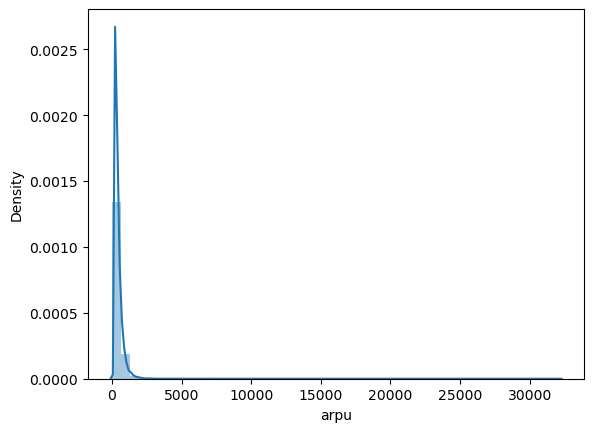

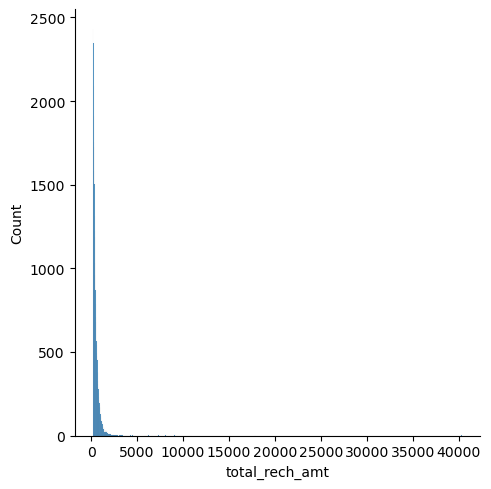

In [32]:
# displot of 'arpu'
sns.distplot(churn_filtered['arpu'])
plt.show()

# displot of 'total_rech_amt'
sns.displot(churn_filtered['total_rech_amt'])
plt.show()

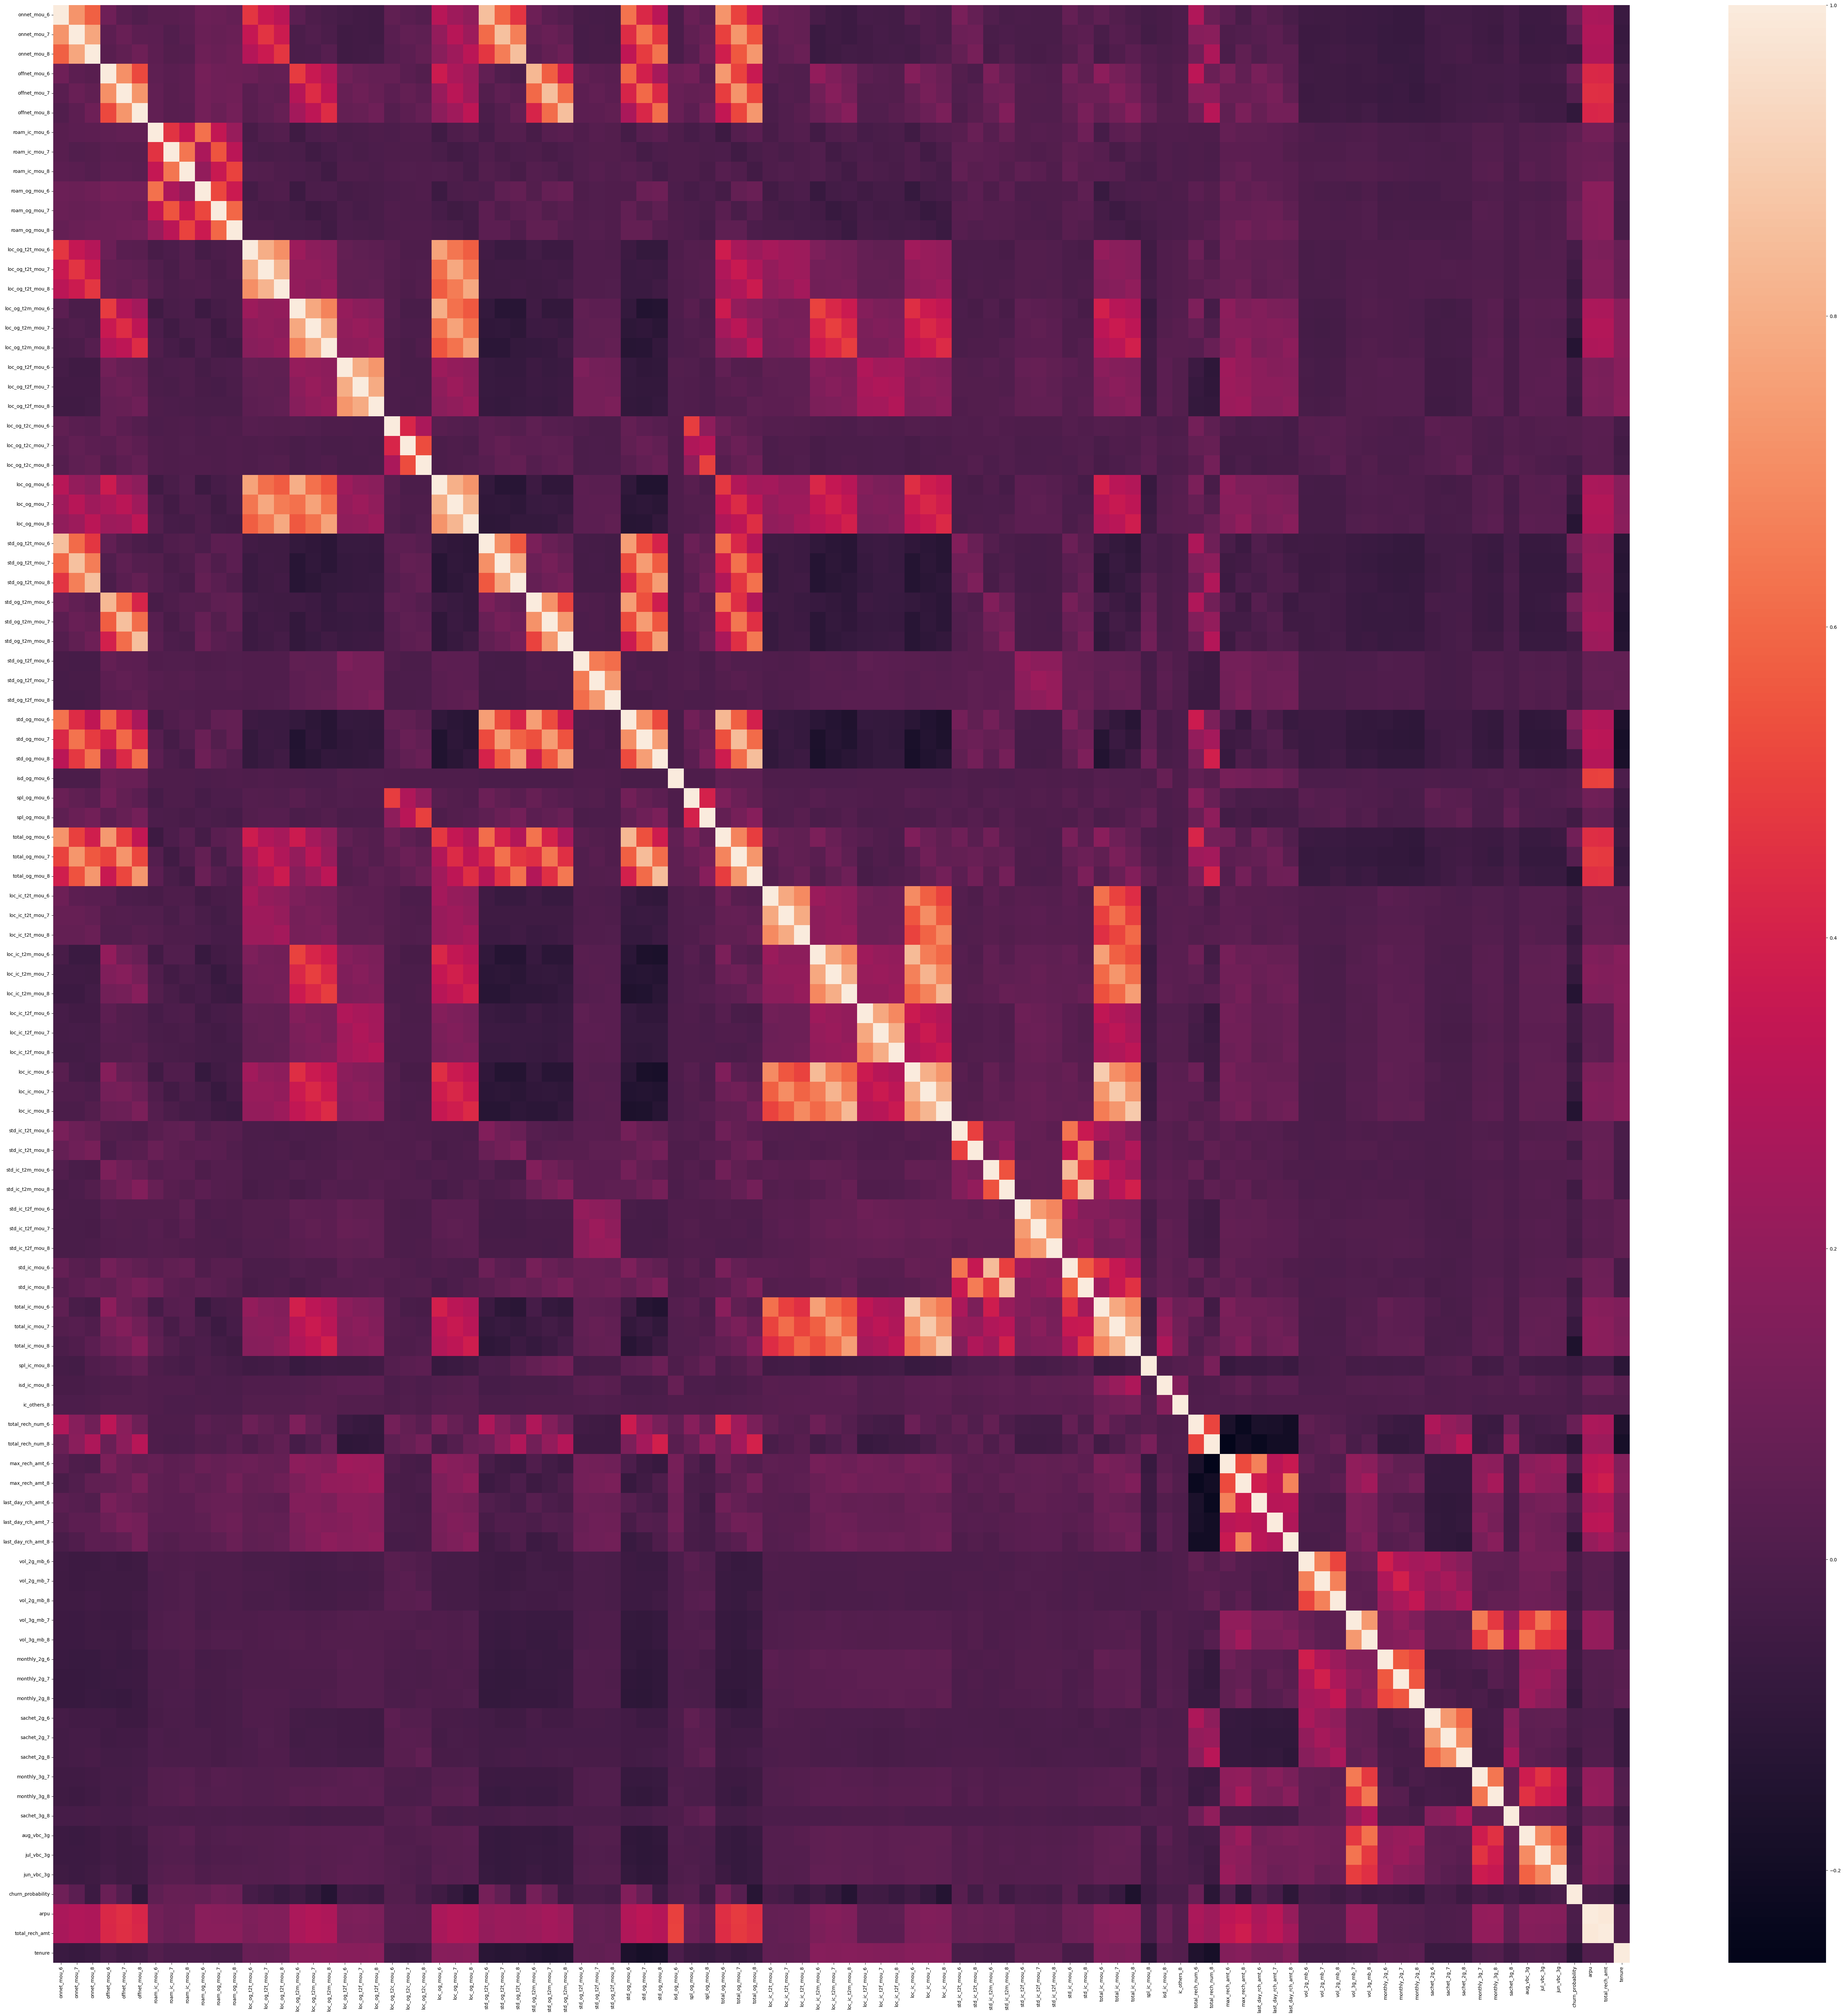

In [33]:
# plotting the heatmap 

plt.figure(figsize = (75, 75))
sns.heatmap(churn_filtered.corr())
plt.show()

In [34]:
# dropping 'arpu' as its highly correlated to 'total_rech_amt'

churn_filtered.drop(['arpu'],axis=1,inplace=True)

In [35]:
# checking the data finally

churn_filtered.describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_6,total_rech_num_8,max_rech_amt_6,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_7,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt,tenure
count,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000,35028.000000
mean,214.595123,225.434601,217.352550,311.687304,320.294096,310.722374,13.456470,10.429241,10.230057,21.787553,15.706499,15.632268,71.641709,72.646566,70.619150,140.025911,140.178921,137.897853,5.442259,5.588414,5.338914,1.342281,1.645391,1.707428,217.363552,218.566741,214.130753,133.813956,146.225102,140.145077,145.033904,157.414272,149.607325,1.565816,1.536312,1.486781,280.572666,305.272785,291.410814,1.525017,4.983137,6.531309,503.503585,530.851017,511.910678,59.113929,60.379672,59.288229,135.464975,137.647515,138.441725,14.051441,14.969408,13.860454,209.027475,213.239144,212.036330,12.644532,13.115855,26.794761,27.389064,2.569281,2.686491,2.450096,42.089458,43.047079,259.551403,268.764006,264.453793,0.033464,10.485780,1.169535,10.084133,9.617563,144.102061,152.231272,88.404733,86.764988,90.386377,69.229581,70.719929,68.551739,214.554838,224.965636,0.112567,0.121503,0.117335,0.465999,0.554813,0.586845,0.133579,0.138860,0.126984,109.193882,106.544762,95.550868,0.069173,525.096913,42.004939
std,386.497118,404.118324,402.995396,397.120964,403.570361,404.816559,66.436211,71.069814,66.251837,97.985351,78.662676,86.953357,196.827224,204.569304,202.719456,207.314800,195.702565,193.245647,17.306616,17.768144,16.881280,6.509112

In [36]:
churn_filtered.shape

(35028, 99)

In [37]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 121 entries, onnet_mou_6 to total_rech_amt
dtypes: float64(98), int64(23)
memory usage: 64.6 MB


**Train-Test Split**

In [38]:
#splitting the data into test and train sets

X = churn_filtered.drop("churn_probability", axis = 1)
y = churn_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26271, 98)
(26271,)
(8757, 98)
(8757,)


**Scaling**

In [40]:
num_col = X_train.columns.tolist()

# scaling the train set

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [41]:
# addressing class imbalance issues using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [42]:
# checking shape after resampling

X_train_sm.shape

(48908, 98)

In [43]:
y_train_sm.shape

(48908,)

## Logistic Regression

In [44]:
# first LR model

logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48908
Model:                            GLM   Df Residuals:                    48809
Model Family:                Binomial   Df Model:                           98
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17860.
Date:                Wed, 14 Feb 2024   Deviance:                       35721.
Time:                        13:39:32   Pearson chi2:                 1.48e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4810
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4027      0.051     27.514      0.000       1.303       1.503
onnet_mou_6            6.2054     13.110      0.473      0.636     -19.490      31.900
onnet_mou_7          -56.3808     16.725     -3.371      0.001     -89.161     -23.601
onnet_mou_8           32.9404     24.435      1.348      0.178     -14.952      80.833
offnet_mou_6          12.3196     14.261      0.864      0.388     -15.632      40.272
offnet_mou_7         -47.3611     12.750     -3.715      0.000     -72.350     -22.372
offnet_mou_8         -21.2922     29.808     -0.714      0.475     -79.714      37.130
roam_ic_mou_6          1.4843      0.792      1.874      0.061      -0.068       3.037
roam_ic_mou_7          3.5878      1.447      2.479      0.013       0.752       6.424
roam_ic_mou_8         -0.1803      0.911     -0.198      0.843      -1.967       1.606
roam_og_mou_6         -2.7922      5.466     -0.511      0.610     -13.506       7.922
roam_og_mou_7         20.1905      5.483      3.683      0.000       9.445      30.936
roam_og_mou_8         16.9262     11.548      1.466      0.143      -5.707      39.559
loc_og_t2t_mou_6    2.882e+04   1.58e+04      1.823      0.068   -2163.013    5.98e+04
loc_og_t2t_mou_7   -2.227e+04   1.77e+04     -1.258      0.208    -5.7e+04    1.24e+04
loc_og_t2t_mou_8    2.546e+05   2.83e+04      9.010      0.000    1.99e+05     3.1e+05
loc_og_t2m_mou_6    2.104e+04   1.15e+04      1.822      0.068   -1586.731    4.37e+04
loc_og_t2m_mou_7   -1.371e+04   1.09e+04     -1.258      0.208   -3.51e+04    7654.432
loc_og_t2m_mou_8    1.175e+05    1.3e+04      9.013      0.000    9.19e+04    1.43e+05
loc_og_t2f_mou_6    2765.7426   1517.844      1.822      0.068    -209.176    5740.661
loc_og_t2f_mou_7   -2456.1858   1950.663     -1.259      0.208   -6279.415    1367.043
loc_og_t2f_mou_8    1.394e+04   1545.979      9.016      0.000    1.09e+04     1.7e+04
loc_og_t2c_mou_6      -2.0237      0.935     -2.165      0.030      -3.856      -0.192
loc_og_t2c_mou_7       3.4651      1.551      2.234      0.025       0.425       6.505
loc_og_t2c_mou_8      -0.7869      1.234     -0.638      0.524      -3.205       1.631
loc_og_mou_6       -4.743e+04   2.62e+04     -1.813      0.070   -9.87e+04    3832.972
loc_og_mou_7        2.312e+04   1.84e+04      1.259      0.208   -1.29e+04    5.91e+04
loc_og_mou_8       -2.615e+05    2.9e+04     -9.015      0.000   -3.18e+05   -2.05e+05
std_og_t2t_mou_6   -1.239e+05   2.18e+04     -5.693      0.000   -1.67e+05   -8.12e+04
std_og_t2t_mou_7    -7.28e+04   2.39e+04     -3.044      0.002    -1.2e+05   -2.59e+04
std_og_t2t_mou_8    1.277e+05   2.62e+04      4.881      0.000    7.64e+04    1.79e+05
std_og_t2m_mou_6   -1.398e+05   2.46e+04     -5.693      0.000   -1.88e+05   -9.17e+04
std_og_t2m_mou_7   -5.927e+04   1.95e+

**It is observed that some of the features are statistically insignificant**

**It is prudent to proceed with feature elimination**

In [45]:
# Logistic regression with RFE and only selecting 20 features

logreg = LogisticRegression()

rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [46]:
# features selected

print(X_train_sm.columns[rfe.support_])

Index(['roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'aug_vbc_3g', 'total_rech_amt'],
      dtype='object')


In [47]:
# building the new model after RFE

X_train_SM = sm.add_constant(X_train_sm[X_train_sm.columns[rfe.support_]])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48908
Model:                            GLM   Df Residuals:                    48887
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20521.
Date:                Wed, 14 Feb 2024   Deviance:                       41041.
Time:                        13:40:16   Pearson chi2:                 7.04e+13
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4214
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5741      0.027     58.269      0.000       1.521       1.627
roam_og_mou_8         18.4512      1.049     17.583      0.000      16.395      20.508
loc_og_t2m_mou_8      -5.2497      1.682     -3.121      0.002      -8.547      -1.953
loc_og_mou_8         -16.3013      2.658     -6.134      0.000     -21.510     -11.092
std_og_t2f_mou_8     -11.4316      1.531     -7.465      0.000     -14.433      -8.430
std_og_mou_7           7.9131      0.344     22.993      0.000       7.239       8.588
total_og_mou_8       -17.5131      0.766    -22.874      0.000     -19.014     -16.012
loc_ic_t2t_mou_7      11.5045      1.359      8.466      0.000       8.841      14.168
loc_ic_t2m_mou_6       6.7240      0.614     10.952      0.000       5.521       7.927
loc_ic_t2m_mou_8      -9.2915      2.158     -4.305      0.000     -13.521      -5.062
loc_ic_t2f_mou_8     -20.4743      1.986    -10.310      0.000     -24.367     -16.582
loc_ic_mou_8          20.4858      2.249      9.109      0.000      16.078      24.894
total_ic_mou_8       -44.4762      1.560    -28.517      0.000     -47.533     -41.419
spl_ic_mou_8         -29.8815      1.356    -22.040      0.000     -32.539     -27.224
isd_ic_mou_8          24.2678      0.881     27.545      0.000      22.541      25.995
total_rech_num_8      -8.2697      0.347    -23.806      0.000      -8.951      -7.589
last_day_rch_amt_8   -24.1578      0.739    -32.684      0.000     -25.606     -22.709
monthly_2g_8          -5.3075      0.244    -21.708      0.000      -5.787      -4.828
sachet_2g_8           -9.4969      0.583    -16.288      0.000     -10.640      -8.354
aug_vbc_3g           -14.5001      0.951    -15.253      0.000     -16.363     -12.637
total_rech_amt        35.1085      2.242     15.661      0.000      30.715      39.502
======================================================================================
"""

**All the features are observed to be statistically significant**

In [48]:
rfe_columns = X_train_sm.columns[rfe.support_]

vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,loc_ic_mou_8,20.35
8,loc_ic_t2m_mou_8,10.36
11,total_ic_mou_8,10.20
2,loc_og_mou_8,4.66
1,loc_og_t2m_mou_8,4.32
5,total_og_mou_8,4.25
14,total_rech_num_8,2.68
6,loc_ic_t2t_mou_7,2.66
7,loc_ic_t2m_mou_6,2.40
4,std_og_mou_7,2.33


**It is observed that only three features exhibit multicollinearity issues with the data, hence can be removed**

In [49]:
# removing the columns

columns_to_remove = ['loc_ic_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8']
rfe_columns = [col for col in rfe_columns if col not in columns_to_remove]


In [50]:
# building the model again after removing

X_train_sm = sm.add_constant(X_train_sm[rfe_columns])
logm3 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48908
Model:                            GLM   Df Residuals:                    48890
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21575.
Date:                Wed, 14 Feb 2024   Deviance:                       43149.
Time:                        13:40:17   Pearson chi2:                 4.50e+15
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3959
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6808      0.026     65.679      0.000       1.631       1.731
roam_og_mou_8         18.1965      0.980     18.573      0.000      16.276      20.117
loc_og_t2m_mou_8     -14.2203      1.736     -8.191      0.000     -17.623     -10.818
loc_og_mou_8         -20.9926      2.789     -7.528      0.000     -26.458     -15.527
std_og_t2f_mou_8     -17.7582      1.682    -10.556      0.000     -21.056     -14.461
std_og_mou_7           8.4505      0.347     24.353      0.000       7.770       9.131
total_og_mou_8       -22.9445      0.774    -29.661      0.000     -24.461     -21.428
loc_ic_t2t_mou_7      -1.1190      0.611     -1.831      0.067      -2.317       0.079
loc_ic_t2m_mou_6      -0.2817      0.394     -0.714      0.475      -1.055       0.491
loc_ic_t2f_mou_8     -39.9813      1.985    -20.142      0.000     -43.872     -36.091
spl_ic_mou_8         -31.9410      1.379    -23.159      0.000     -34.644     -29.238
isd_ic_mou_8           3.6535      0.507      7.203      0.000       2.659       4.648
total_rech_num_8     -10.9717      0.349    -31.434      0.000     -11.656     -10.288
last_day_rch_amt_8   -27.4882      0.744    -36.958      0.000     -28.946     -26.030
monthly_2g_8          -5.6658      0.242    -23.428      0.000      -6.140      -5.192
sachet_2g_8           -9.8265      0.585    -16.804      0.000     -10.973      -8.680
aug_vbc_3g           -16.8074      0.945    -17.785      0.000     -18.660     -14.955
total_rech_amt        45.1783      2.281     19.807      0.000      40.708      49.649
======================================================================================
"""

In [51]:
# Checking the VIF again

vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_8,4.53
5,total_og_mou_8,4.13
1,loc_og_t2m_mou_8,3.99
11,total_rech_num_8,2.65
4,std_og_mou_7,2.31
16,total_rech_amt,2.23
7,loc_ic_t2m_mou_6,1.69
12,last_day_rch_amt_8,1.56
6,loc_ic_t2t_mou_7,1.26
14,sachet_2g_8,1.25


**The VIF now seems to be in order and we can proceed with the prediction**

In [53]:
# predicting on the train set

y_train_sm_pred = res.predict(X_train_sm)
y_train_sm_pred[:10]

0    0.238549
1    0.877182
2    0.670926
3    0.070939
4    0.066930
5    0.047000
6    0.432344
7    0.376857
8    0.017386
9    0.088801
dtype: float64

In [54]:
# creating a dataframe that has the actual churn and the predicted churn values

y_train_sm_pred_df = pd.DataFrame({'churn_probability':y_train_sm.values, 'predicted_churn':y_train_sm_pred})
y_train_sm_pred_df.head(20)

,churn_probability,predicted_churn
0,0,2.385485e-01
1,1,8.771823e-01
2,0,6.709255e-01
3,0,7.093857e-02
4,0,6.692959e-02
5,0,4.700034e-02
6,0,4.323440e-01
7,0,3.768570e-01
8,0,1.738621e-02
9,0,8.880113e-02


In [55]:
# now finding the optimum probability cutoff

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_df[i] = y_train_sm_pred_df.predicted_churn.map(lambda x: 1 if x > i else 0)
    
y_train_sm_pred_df.head(20)

,churn_probability,predicted_churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.385485e-01,1,1,1,0,0,0,0,0,0,0
1,1,8.771823e-01,1,1,1,1,1,1,1,1,1,0
2,0,6.709255e-01,1,1,1,1,1,1,1,0,0,0
3,0,7.093857e-02,1,0,0,0,0,0,0,0,0,0
4,0,6.692959e-02,1,0,0,0,0,0,0,0,0,0
5,0,4.700034e-02,1,0,0,0,0,0,0,0,0,0
6,0,4.323440e-01,1,1,1,1,1,0,0,0,0,0
7,0,3.768570e-01,1,1,1,1,0,0,0,0,0,0
8,0,1.738621e-02,1,0,0,0,0,0,0,0,0,0
9,0,8.880113e-02,1,0,0,0,0,0,0,0,0,0


In [56]:
# calculate accuracy and other metrics

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

In [57]:
# printing the metrics for each of the cutoffs 

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_df.churn_probability, y_train_sm_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.660505     0.973706     0.347305
0.2          0.2  0.718778     0.950478     0.487078
0.3          0.3  0.762104     0.923039     0.601170
0.4          0.4  0.793551     0.888362     0.698740
0.5          0.5  0.813343     0.840721     0.785965
0.6          0.6  0.820193     0.779586     0.860800
0.7          0.7  0.807250     0.697391     0.917110
0.8          0.8  0.738080     0.520119     0.956040
0.9          0.9  0.565613     0.145293     0.985933


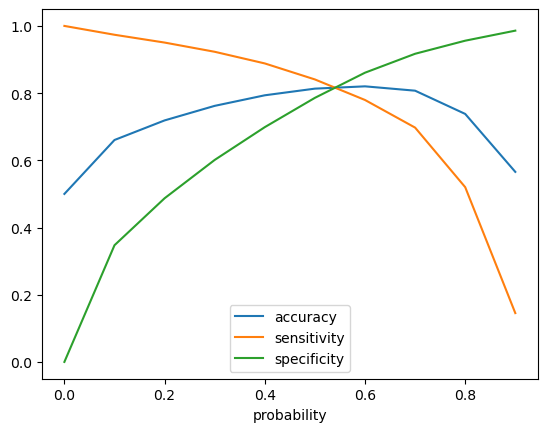

In [58]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Looking at the intersection 0.55 is taken as the cut-off point**

In [59]:
# recalculating the probabilities again

y_train_sm_pred_df['final_churn_pred'] = y_train_sm_pred_df.predicted_churn.map( lambda x: 1 if x > 0.55 else 0)

y_train_sm_pred_df.head(20)

,churn_probability,predicted_churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_churn_pred
0,0,2.385485e-01,1,1,1,0,0,0,0,0,0,0,0
1,1,8.771823e-01,1,1,1,1,1,1,1,1,1,0,1
2,0,6.709255e-01,1,1,1,1,1,1,1,0,0,0,1
3,0,7.093857e-02,1,0,0,0,0,0,0,0,0,0,0
4,0,6.692959e-02,1,0,0,0,0,0,0,0,0,0,0
5,0,4.700034e-02,1,0,0,0,0,0,0,0,0,0,0
6,0,4.323440e-01,1,1,1,1,1,0,0,0,0,0,0
7,0,3.768570e-01,1,1,1,1,0,0,0,0,0,0,0
8,0,1.738621e-02,1,0,0,0,0,0,0,0,0,0,0
9,0,8.880113e-02,1,0,0,0,0,0,0,0,0,0,0


In [60]:
# checking the accuracy score

print("Train set overall accuracy:",metrics.accuracy_score(y_train_sm_pred_df.churn_probability, y_train_sm_pred_df.final_churn_pred))

Train set overall accuracy: 0.818577737793408


In [61]:
# Now calculating the confusion matrix

confusion = metrics.confusion_matrix(y_train_sm_pred_df.churn_probability, y_train_sm_pred_df.final_churn_pred )
print(confusion)

[[20200  4254]
 [ 4619 19835]]


In [62]:
# finding the values of other metrics using the confusion matrix

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


print("Sensitivity = ",TP/float(TP+FN))

print("Specificity = ",TN /float(TN+FP))

print("False Positive Rate = ",FP/float(TN+FP))

print ("Precision = ",TP/float(TP+FP))

print ("True Negative Prediction Rate = ",TN/float(TN + FN))

Sensitivity =  0.8111147460538153
Specificity =  0.8260407295330008
False Positive Rate =  0.17395927046699927
Precision =  0.8234048735937565
True Negative Prediction Rate =  0.8138925822958217


**Predicting on the test set**

In [63]:
# Scaling the test data

X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_6,total_rech_num_8,max_rech_amt_6,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_7,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt,tenure
39275,0.012022,0.005971,0.002203,0.017953,0.022446,0.008575,0.000000,0.0,0.0,0.000000,0.0,0.0,0.013789,0.006582,0.002203,0.031166,0.026361,0.024209,0.006056,0.00785,0.000000,0.000000,0.024012,0.000000,0.022437,0.022833,0.013026,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.022373,0.024139,0.010241,0.015527,0.009526,0.009527,0.031592,0.023519,0.024589,0.003066,0.006349,0.000000,0.028724,0.025006,0.028657,0.000000,0.000787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000394,0.027822,0.023409,0.025428,0.000000,0.000000,0.000000,0.032,0.021739,0.030908,0.024725,0.033343,0.035484,0.006743,0.000000,0.038585,0.0,0.000000,0.0,0.00,0.0,0.0,0.00000,0.0,0.0,0.0625,0.0,0.0,0.000000,0.000000,0.000000,0.000999,0.666667
8542,0.004831,0.005912,0.000000,0.027804,0.047209,0.000008,0.000000,0.0,0.0,0.000000,0.0,0.0,0.004646,0.002350,0.000000,0.023280,0.023859,0.000000,0.000000,0.00000,0.000000,0.001342,0.014937,0.000313,0.013081,0.016434,0.000000,0.000782,0.003790,0.00000,0.014756,0.029360,0.000000,0.000000,0.0,0.000000,0.015233,0.027623,0.000000,0.0,0.007389,0.000974,0.026244,0.046705,0.000066,0.044153,0.023142,0.000488,0.023643,0.023176,0.017409,0.002249,0.002668,0.003704,0.040529,0.035684,0.016778,0.000049,0.000356,0.001104,0.000009,0.000000,0.000000,0.000000,0.001147,0.000187,0.039610,0.034997,0.014952,0.089445,0.000020,0.000115,0.192,0.021739,0.014049,0.006743,0.015156,0.016129,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.008473,0.369565
41294,0.001066,0.002830,0.004997,0.044591,0.032029,0.009082,0.000000,0.0,0.0,0.000000,0.0,0.0,0.001222,0.003120,0.004997,0.073056,0.043753,0.020793,0.015318,0.00406,0.028404,0.000000,0.000000,0.000000,0.033867,0.029422,0.015726,0.000000,0.000000,0.00000,0.002278,0.001987,0.000151,0.000000,0.0,0.016811,0.002246,0.001614,0.000524,0.0,0.001319,0.000000,0.035672,0.028843,0.012885,0.007308,0.012101,0.003703,0.013097,0.026791,0.035284,0.044319,0.068093,0.096888,0.023231,0.048252,0.064279,0.000000,0.000000,0.009059,0.001030,0.000000,0.002183,0.000401,0.009014,0.001103,0.026018,0.044879,0.057241,0.000000,0.000000,0.000000,0.048,0.028986,0.076988,0.028771,0.083055,0.049677,0.000000,0.004052,0.005788,0.0,0.046236,0.0,0.25,0.2,0.0,0.02381,0.0,0.0,0.0000,0.0,0.0,0.039902,0.142313,0.064168,0.003154,0.101449
23837,0.009339,0.011282,0.006443,0.009805,0.062570,0.039456,0.000089,0.0,0.0,0.000816,0.0,0.0,0.000953,0.001262,0.002954,0.004548,0.010

In [64]:
# feature selection using RFE 

X_test=X_test[rfe_columns]
X_test.head()

,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,aug_vbc_3g,total_rech_amt
39275,0.0,0.024209,0.013026,0.000000,0.000000,0.010241,0.009526,0.031592,0.000000,0.000000,0.000000,0.021739,0.006743,0.0,0.0,0.000000,0.000999
8542,0.0,0.000000,0.000000,0.000000,0.027623,0.000066,0.023142,0.023643,0.003704,0.089445,0.000020,0.021739,0.000000,0.0,0.0,0.000000,0.008473
41294,0.0,0.020793,0.015726,0.016811,0.001614,0.012885,0.012101,0.013097,0.096888,0.000000,0.000000,0.028986,0.000000,0.0,0.0,0.039902,0.003154
23837,0.0,0.024074,0.013697,0.000000,0.055874,0.044289,0.001814,0.000714,0.000155,0.000000,0.016274,0.072464,0.011238,0.0,0.0,0.000000,0.002289
21954,0.0,0.148333,0.074016,0.000000,0.002447,0.058921,0.018395,0.223561,0.009478,0.000000,0.000000,0.050725,0.029220,0.0,0.0,0.000000,0.024943


In [65]:
# predicting on the test set

# Adding constant to the test model.
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)

In [66]:
print(y_test_pred[:10])

39275    0.605832
8542     0.272781
41294    0.013890
23837    0.391112
21954    0.017830
15627    0.941892
62222    0.170394
47420    0.002745
54715    0.004243
21499    0.356258
dtype: float64


In [67]:
# creating a dataframe for the prediction values

y_pred = pd.DataFrame(y_test_pred)
y_pred.head(20)

,0
39275,0.605832
8542,0.272781
41294,0.013890
23837,0.391112
21954,0.017830
15627,0.941892
62222,0.170394
47420,0.002745
54715,0.004243
21499,0.356258


In [68]:
# renaming the column

y_pred=y_pred.rename(columns = {0:"predicted_churn"})

# creating a dataframe for y_test

y_test_df = pd.DataFrame(y_test)

#concatinating the dataframes y_test and y_pred

y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head(20)

,churn_probability,predicted_churn
39275,0,0.605832
8542,0,0.272781
41294,0,0.013890
23837,0,0.391112
21954,0,0.017830
15627,1,0.941892
62222,0,0.170394
47420,0,0.002745
54715,0,0.004243
21499,0,0.356258


In [69]:
# using the same cutoff of 0.55 for the test set also

y_pred_final['final_test_churn_pred'] = y_pred_final.predicted_churn.map(lambda x: 1 if x>0.55 else 0)
y_pred_final.head(20)

,churn_probability,predicted_churn,final_test_churn_pred
39275,0,0.605832,1
8542,0,0.272781,0
41294,0,0.013890,0
23837,0,0.391112,0
21954,0,0.017830,0
15627,1,0.941892,1
62222,0,0.170394,0
47420,0,0.002745,0
54715,0,0.004243,0
21499,0,0.356258,0


In [70]:
# checking the accuracy of test set

print('Test accuracy score =', metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.final_test_churn_pred))


Test accuracy score = 0.8232271325796505


In [71]:
# Confusion Matrix

confusion_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.final_test_churn_pred)
print("Confusion Matrix\n",confusion_test)

Confusion Matrix
 [[6734 1417]
 [ 131  475]]


In [72]:
# evaluating the other metrics on the test set

TP2 = confusion_test[1,1] # true positive 
TN2 = confusion_test[0,0] # true negatives
FP2 = confusion_test[0,1] # false positives
FN2 = confusion_test[1,0] # false negatives

In [73]:
# printing all the metrics

print("Sensitivity = ",TP2 / float(TP2+FN2))

print("Specificity = ",TN2 / float(TN2+FP2))

print("False Positive Rate = ",FP2/ float(TN2+FP2))

print ("Precision = ",TP2 / float(TP2+FP2))

print ("True Negative Prediction Rate = ",TN2 / float(TN2+FN2))

Sensitivity =  0.7838283828382838
Specificity =  0.8261562998405104
False Positive Rate =  0.17384370015948963
Precision =  0.2510570824524313
True Negative Prediction Rate =  0.9809176984705026


In [74]:
# printing the train and test accuracy scores

print("Train set overall accuracy:",metrics.accuracy_score(y_train_sm_pred_df.churn_probability, y_train_sm_pred_df.final_churn_pred))

print('Test accuracy score =', metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.final_test_churn_pred))

Train set overall accuracy: 0.818577737793408
Test accuracy score = 0.8232271325796505


**The train and test scores are close to one another** 

**Further analysis to be continued using PCA and tree models**

## PCA with LogisticRegression

In [75]:
from sklearn.decomposition import PCA 

In [76]:
pca = PCA()

In [77]:
pca_train = pca.fit(X_train_sm[rfe_columns])
pca_train.explained_variance_ratio_

array([0.27488962, 0.21495567, 0.14399277, 0.08788151, 0.04990937,
       0.03925198, 0.03174401, 0.02676506, 0.02478061, 0.02018159,
       0.01855605, 0.0179435 , 0.01484718, 0.01397846, 0.01268043,
       0.00493714, 0.00270505])

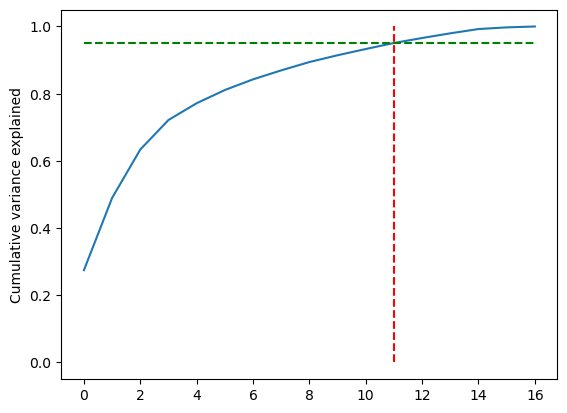

In [78]:
cumvar = np.cumsum(pca_train.explained_variance_ratio_)
plt.plot(range(len(cumvar)), cumvar)
plt.hlines(y=0.95, xmax=16, xmin=0, colors="g", linestyles="--")
plt.vlines(x=11, ymax=1, ymin=0, colors="r", linestyles="--")
plt.ylabel("Cumulative variance explained")
plt.show()

**Perform PCA with 11 components**

In [79]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=11)
df_train_pca = pca_final.fit_transform(X_train_sm[rfe_columns])
df_train_pca.shape

(48908, 11)

In [80]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [81]:
corrmat.shape

(11, 11)

<AxesSubplot:>

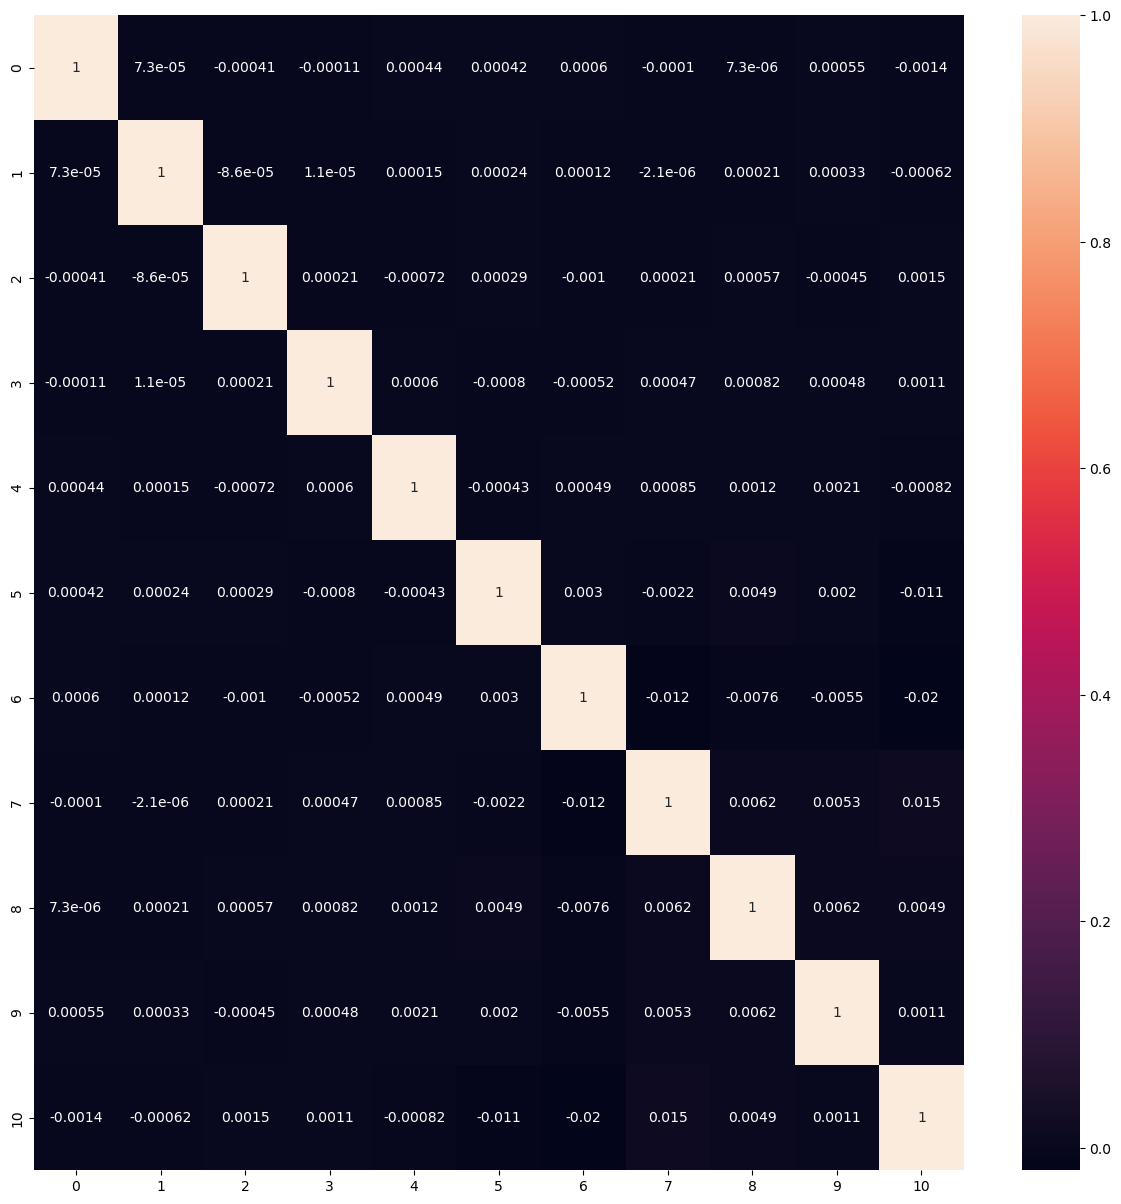

In [82]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [83]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8757, 11)

### Applying logistic regression on the data on our Principal components

In [84]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train_sm)

In [85]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [86]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.85'

**It is observed that the accuracy has improved from 0.81 to 0.85 when using logistic regression with PCA**

**The scores can be further improved using random forests**

## Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(X_train_sm[rfe_columns],y_train_sm)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [88]:
rf_best = grid_search.best_estimator_

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
# printing the train and test scores

print("Train Accuracy :", accuracy_score(y_train_sm, rf_best.predict(X_train_sm[rfe_columns])))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train_sm, rf_best.predict(X_train_sm[rfe_columns])))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf_best.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, rf_best.predict(X_test)))

Train Accuracy : 0.970618303753987
Train Confusion Matrix:
[[23537   917]
 [  520 23934]]
--------------------------------------------------
Test Accuracy : 0.9122987324426174
Test Confusion Matrix:
[[7582  569]
 [ 199  407]]


In [91]:
# Evaluating the various metrics using the confusion matrix

confusion_matrix_3 = confusion_matrix(y_train_sm, rf_best.predict(X_train_sm[rfe_columns]))

TP3 = confusion_matrix_3[1,1] # true positive 
TN3 = confusion_matrix_3[0,0] # true negatives
FP3 = confusion_matrix_3[0,1] # false positives
FN3 = confusion_matrix_3[1,0] # false negatives

In [92]:
# printing all the metrics

print("Sensitivity = ",TP3 / float(TP3+FN3))

print("Specificity = ",TN3 / float(TN3+FP3))

print("False Positive Rate = ",FP3/ float(TN3+FP3))

print ("Precision = ",TP3 / float(TP3+FP3))

print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.9787355851803385
Specificity =  0.9625010223276356
False Positive Rate =  0.03749897767236444
Precision =  0.9631000764556759
True Negative Prediction Rate =  0.9783846697426944


In [93]:
rf_best.feature_importances_

array([0.21637869, 0.07222537, 0.09592056, 0.00542472, 0.04609813,
       0.14349378, 0.02232667, 0.022161  , 0.05506411, 0.01417528,
       0.01075367, 0.08038886, 0.13071321, 0.01269119, 0.02631083,
       0.02039032, 0.02548362])

In [94]:

imp_df = pd.DataFrame({
    "Varname": rfe_columns,
    "Imp": rf_best.feature_importances_
})

In [95]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,roam_og_mou_8,0.216379
5,total_og_mou_8,0.143494
12,last_day_rch_amt_8,0.130713
2,loc_og_mou_8,0.095921
11,total_rech_num_8,0.080389
1,loc_og_t2m_mou_8,0.072225
8,loc_ic_t2f_mou_8,0.055064
4,std_og_mou_7,0.046098
14,sachet_2g_8,0.026311
16,total_rech_amt,0.025484


## Conclusions:

**The random forest is chosen to be the appropriate model for analysis as it offers the best accuracy score in comparison to the other models.**

**It is observed outgoing calls, in particular when in roaming are the biggest predictors of churn, It is prudent for the telecom company to offer plans that target the outgoing call experience of consumers and improve their plans that cater to customers that are in roaming.**

**The accuracy scores of the selected random forest model are Train accuracy ~ 97% and Test accuracy ~92%**   

## Building the model for test.csv 

In [96]:
# importing the test.csv file

churn_test = pd.read_csv("E:\\Documents\\AIML_masters\\course3_advanced_LinearRegression\\week9\\telecom-churn-case-study-hackathon-c56\\test.csv")

In [97]:
churn_test.shape

(30000, 171)

In [98]:
churn_test.head(20)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.00,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.00,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014

In [99]:
churn_test.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [100]:
# deriving the same columns as on the train set

churn_test['arpu'] = (churn_test.arpu_6 + churn_test.arpu_7 + churn_test.arpu_8)/3
churn_test['total_rech_amt'] = (churn_test.total_rech_amt_6 + churn_test.total_rech_amt_7 + churn_test.total_rech_amt_8)/3
churn_test['tenure'] = (churn_test['aon']/30).round(0)

In [101]:
# extracting the id column 

churn_id = churn_test['id']

In [102]:
# retaining only the final columns of the train set for evaluation

churn_test = churn_test[rfe_columns]

In [103]:
churn_test.shape

(30000, 17)

In [104]:
churn_test.head(20)

,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,aug_vbc_3g,total_rech_amt
0,0.00,8.36,29.43,0.0,7.68,57.94,37.56,10.21,0.00,0.39,0.00,4,0,0,0,0.00,84.333333
1,0.00,377.26,397.11,0.0,23.76,415.59,26.95,160.19,0.00,0.00,94.23,5,0,0,0,0.00,500.000000
2,54.44,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,0,0,0,525.61,833.333333
3,0.00,20.51,22.86,0.0,96.53,24.01,54.64,487.94,1.64,0.00,8.65,2,0,0,0,0.00,123.333333
4,0.00,10.94,25.51,0.0,629.43,779.78,0.36,10.13,0.00,0.00,0.00,8,130,0,0,0.00,464.000000
5,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0,0,0,0,0.00,41.666667
6,19.45,14.48,40.43,0.0,4.33,46.01,9.56,5.33,0.50,0.00,0.00,3,0,0,0,0.00,50.000000
7,0.00,21.03,21.03,0.0,1.61,21.21,3.79,28.83,8.93,0.23,0.00,3,0,0,0,0.00,56.666667
8,0.00,16.31,17.16,0.0,184.43,96.71,0.51,65.26,3.11,0.00,0.00,12,10,0,0,2.91,318.333333
9,NaN,NaN,NaN,NaN,2.50,0.00,7.83,NaN,NaN,NaN,NaN,2,0,0,0,0.00,149.000000


In [105]:
# imputing the NaN values in test set using median

churn_test = churn_test.apply(lambda x: x.fillna(x.median()))

In [106]:
# checking for NaN values again

churn_test.isna().sum()

roam_og_mou_8         0
loc_og_t2m_mou_8      0
loc_og_mou_8          0
std_og_t2f_mou_8      0
std_og_mou_7          0
total_og_mou_8        0
loc_ic_t2t_mou_7      0
loc_ic_t2m_mou_6      0
loc_ic_t2f_mou_8      0
spl_ic_mou_8          0
isd_ic_mou_8          0
total_rech_num_8      0
last_day_rch_amt_8    0
monthly_2g_8          0
sachet_2g_8           0
aug_vbc_3g            0
total_rech_amt        0
dtype: int64

## Random forest model

In [107]:
test_prediction = rf_best.predict(churn_test)

In [108]:
test_prediction.shape

(30000,)

In [109]:
churn_id.shape

(30000,)

In [110]:
final_test_prediction = pd.DataFrame({'id':churn_id,'churn_probability':test_prediction})

In [111]:
final_test_prediction.to_csv('submission.csv',index=False)